# Description:
##### Data from consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

##### The data given contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest retc.ate, 


# Objective
##### The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. :

# Approach
## We will be following the below standard approach to draw insights with respect to data provided:
- Data Cleaning
- Univariate Analysis
- Segmented Univariate Analysis and Bivariate Analysis
- Summary

## Data Cleaning
Let's begin with data loading and cleaning as that's the most important step with for EDA,we will be performing below tasks in this section:

- Data loading
- Removal of Null columns
- Correcting the blank rows
- Correcting the columns data type
- Sanity checks

### Data Loading

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [8]:
df=pd.read_csv('loan.csv',low_memory=False) #using low_memory=False, due to mixed data types in the columns 

In [9]:
#checking the shape of the data

df.shape

(39717, 111)

In [10]:
# We have 111 columns and 39717 rows, let's take a sneak peak into the the data:

df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


##### Data has been loaded sucessfully

 ### Check null values in the dataset

In [13]:
df.isna().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

### Removal of Null columns

In [15]:
# By looking at the data it seems there are many null columns in the dataset, let's go ahead and drop them altogether:
df.dropna(axis=1,how='all',inplace=True)

In [16]:
df.shape


(39717, 57)

In [17]:
# Now we are left with 57 columns out of 111, Lets identify other columns how many null values are there 

In [18]:
# Identify columns with only one unique value
single_unique_value_columns = df.columns[df.nunique() == 1]

single_unique_value_columns

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [19]:
# we have 9 columns with single values, we can drop those colums from our data set

In [20]:
df.drop(single_unique_value_columns, axis=1, inplace=True)

In [21]:
df.shape


(39717, 48)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

##### We have removed the null columns and columns that had single entry in all rows 

In [24]:
#checcking the null value counts again after imputing the rows on the dataset:

df.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
desc                       12942
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec   

In [25]:
# by the above results we can see "next_pymnt_d", "mths_since_last_delinq", "mths_since_last_record"  are having mostly missing values
# so we are going to drop those columns

# List of column names to drop
columns_to_drop = ['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'] 
# Drop the specified columns 
df.drop(columns_to_drop, axis=1, inplace=True)

In [26]:
df.shape

(39717, 45)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [28]:
# Drop the columns which are not useful for EDA 


columns_to_drop_unused = ['last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'collection_recovery_fee', 'recoveries', 'total_rec_late_fee',
                         'total_rec_int','total_rec_prncp','total_pymnt_inv','out_prncp_inv','out_prncp','revol_util','revol_bal',
                          'inq_last_6mths','zip_code','desc','url','earliest_cr_line'] 

df.drop(columns_to_drop_unused, axis=1, inplace=True)



In [29]:
df.shape

(39717, 27)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   member_id             39717 non-null  int64  
 2   loan_amnt             39717 non-null  int64  
 3   funded_amnt           39717 non-null  int64  
 4   funded_amnt_inv       39717 non-null  float64
 5   term                  39717 non-null  object 
 6   int_rate              39717 non-null  object 
 7   installment           39717 non-null  float64
 8   grade                 39717 non-null  object 
 9   sub_grade             39717 non-null  object 
 10  emp_title             37258 non-null  object 
 11  emp_length            38642 non-null  object 
 12  home_ownership        39717 non-null  object 
 13  annual_inc            39717 non-null  float64
 14  verification_status   39717 non-null  object 
 15  issue_d            

### Correcting the columns data type

#### From below command, we can identify that the data type of below columns isn't correct:
- loan_amnt
- funded_amnt
- funded_amnt_inv
- int_rate
- issue_d
- dti
  

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   member_id             39717 non-null  int64  
 2   loan_amnt             39717 non-null  int64  
 3   funded_amnt           39717 non-null  int64  
 4   funded_amnt_inv       39717 non-null  float64
 5   term                  39717 non-null  object 
 6   int_rate              39717 non-null  object 
 7   installment           39717 non-null  float64
 8   grade                 39717 non-null  object 
 9   sub_grade             39717 non-null  object 
 10  emp_title             37258 non-null  object 
 11  emp_length            38642 non-null  object 
 12  home_ownership        39717 non-null  object 
 13  annual_inc            39717 non-null  float64
 14  verification_status   39717 non-null  object 
 15  issue_d            

In [34]:
# correcting int_rate by removing '%' and changing format to float
df.int_rate = df.int_rate.apply(lambda x: float(x.replace('%', '').strip()))

In [35]:
df['loan_amnt'] = df['loan_amnt'].astype(float).round(2)
df['funded_amnt'] = df['funded_amnt'].astype(float).round(2)
df['funded_amnt_inv'] = df['funded_amnt_inv'].astype(float).round(2)
df['dti'] = df['dti'].astype(float).round(2)
df.issue_d=pd.to_datetime(df.issue_d, format='%b-%y')


In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    39717 non-null  int64         
 1   member_id             39717 non-null  int64         
 2   loan_amnt             39717 non-null  float64       
 3   funded_amnt           39717 non-null  float64       
 4   funded_amnt_inv       39717 non-null  float64       
 5   term                  39717 non-null  object        
 6   int_rate              39717 non-null  float64       
 7   installment           39717 non-null  float64       
 8   grade                 39717 non-null  object        
 9   sub_grade             39717 non-null  object        
 10  emp_title             37258 non-null  object        
 11  emp_length            38642 non-null  object        
 12  home_ownership        39717 non-null  object        
 13  annual_inc      

### Add New Colums 
- issue_year
- total_interest_amount


In [38]:
df['issue_year'] = df['issue_d'].dt.year

In [39]:
# Convert interest rate from percentage to decimal
df['int_rate_decimal'] = df['int_rate'] / 100

In [40]:
# Convert term from months to years
df['term_years'] = df['term'].apply(lambda x: int(x.split()[0]) / 12)


In [41]:
df['total_interest_amount'] = df['loan_amnt'] * df['int_rate_decimal'] * df['term_years']

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     39717 non-null  int64         
 1   member_id              39717 non-null  int64         
 2   loan_amnt              39717 non-null  float64       
 3   funded_amnt            39717 non-null  float64       
 4   funded_amnt_inv        39717 non-null  float64       
 5   term                   39717 non-null  object        
 6   int_rate               39717 non-null  float64       
 7   installment            39717 non-null  float64       
 8   grade                  39717 non-null  object        
 9   sub_grade              39717 non-null  object        
 10  emp_title              37258 non-null  object        
 11  emp_length             38642 non-null  object        
 12  home_ownership         39717 non-null  object        
 13  a

### Sanity Checks

##### Let's validate our dataset now before starting the analysis


In [45]:
df.id.is_unique
#we got output as true which implies each record is unique

True

In [46]:
df.member_id.is_unique
#we got output as True which implies each member is tagged to a unique id

True

In [47]:
df.grade.is_unique


False

In [48]:
unique_grade = df['grade'].unique()
unique_grade

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [49]:
unique_home_ownership = df['home_ownership'].unique()
unique_home_ownership

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [50]:
unique_verification_status = df['verification_status'].unique()
unique_verification_status


array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [51]:
unique_loan_status = df['loan_status'].unique()
unique_loan_status


array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [52]:
unique_emp_length = df['emp_length'].unique()
unique_emp_length


array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [53]:
#update values in  verification_status and emp_length
df['verification_status'].replace('Source Verified', 'Verified', inplace = True)



/var/folders/pb/rm_km_ts0pb5v_q25wvzmby80000gn/T/ipykernel_7404/2194412998.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['verification_status'].replace('Source Verified', 'Verified', inplace = True)


In [54]:
df.verification_status.value_counts()


verification_status
Verified        22796
Not Verified    16921
Name: count, dtype: int64

In [55]:
df['emp_length'].replace({
    '10+ years': '10',
    '< 1 year': '0',
    '1 year': '1',
    '2 years': '2',
    '3 years': '3',
    '4 years': '4',
    '5 years': '5',
    '6 years': '6',
    '7 years': '7',
    '8 years': '8',
    '9 years': '9'
}, inplace=True)


/var/folders/pb/rm_km_ts0pb5v_q25wvzmby80000gn/T/ipykernel_7404/140080441.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['emp_length'].replace({


In [56]:
df.emp_length.value_counts()


emp_length
10    8879
0     4583
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: count, dtype: int64

In [57]:
df.shape

(39717, 31)

### Identify Outliers

##### We can perform outliers check on below columns 
- loan_amnt
- funded_amnt
- funded_amnt_inv
- int_rate
- installment
- annual_inc


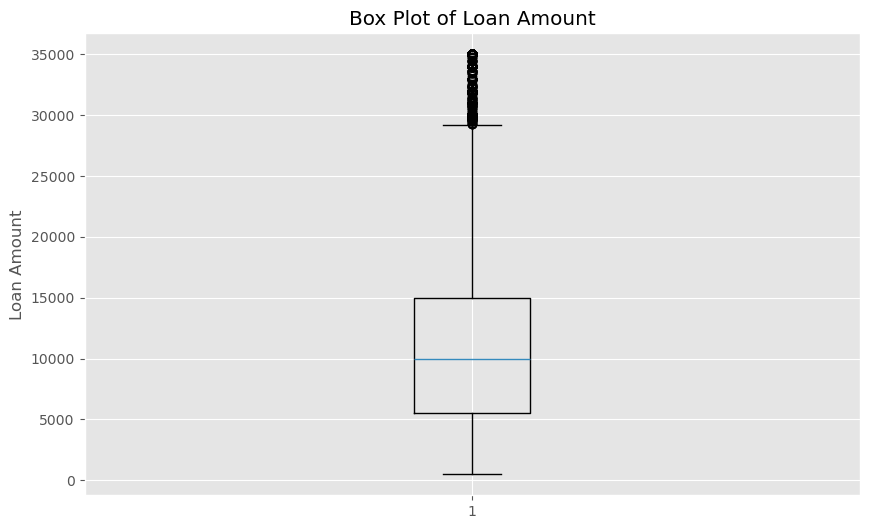

In [60]:
# Draw the box plot Loan Amount
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.boxplot(df['loan_amnt'])
plt.title('Box Plot of Loan Amount')
plt.ylabel('Loan Amount')
plt.show()

##### The loan amount of most of the rows is between 5, 000 - 15, 000


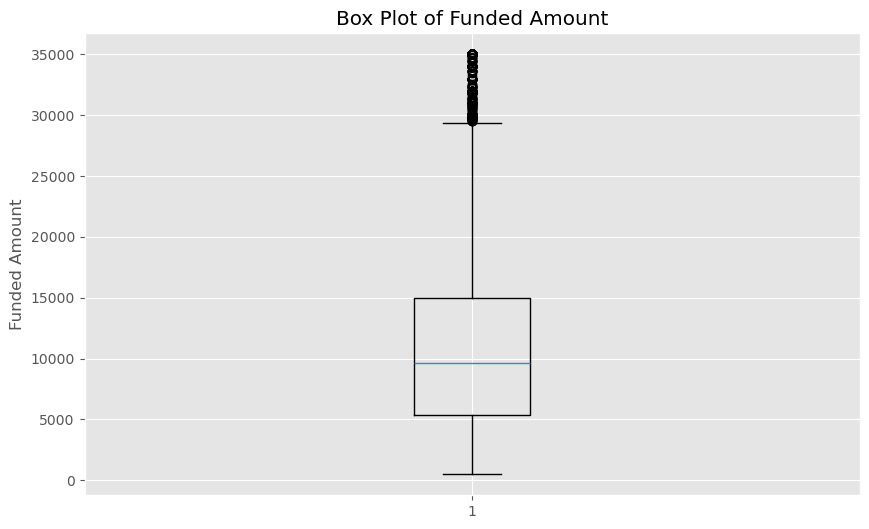

In [62]:
# Draw the box plot funded amount
plt.figure(figsize=(10, 6))
plt.boxplot(df['funded_amnt'])
plt.title('Box Plot of Funded Amount')
plt.ylabel('Funded Amount')
plt.show()

##### The Funded amount of most of the rows is between 5, 000 - 15, 000


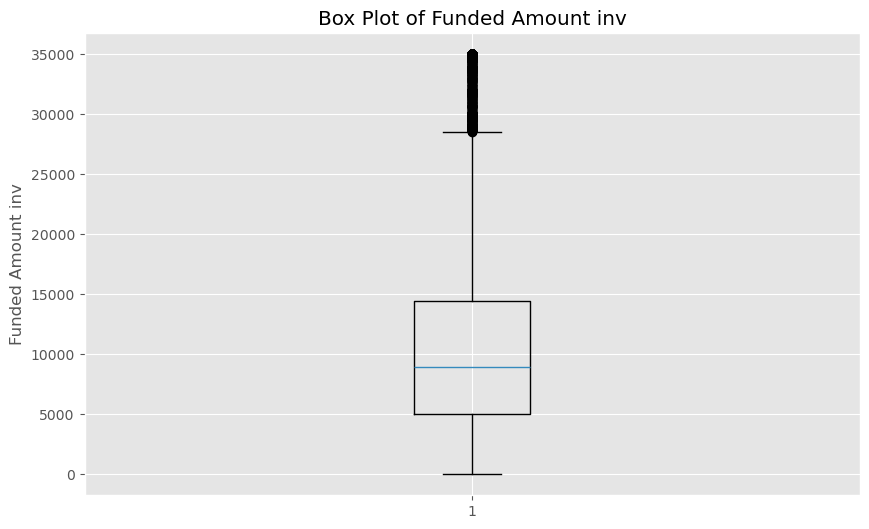

In [64]:

# Draw the box plot funded amount inv
plt.figure(figsize=(10, 6))
plt.boxplot(df['funded_amnt_inv'])
plt.title('Box Plot of Funded Amount inv')
plt.ylabel('Funded Amount inv')
plt.show()


##### The Funded amount Inv of most of the rows is between 5, 000 - 15, 000


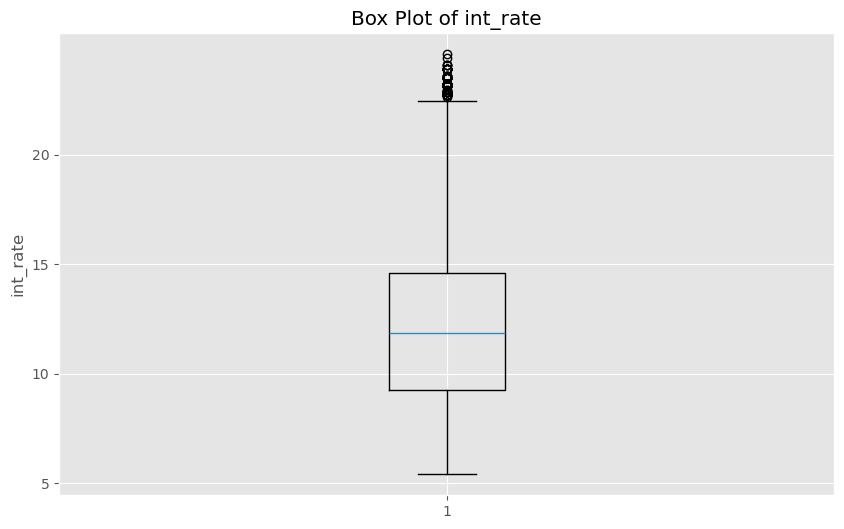

In [66]:

# Draw the box plot int_rate
y_ticks = np.arange(5, 25, 5)
plt.figure(figsize=(10, 6))
plt.boxplot(df['int_rate'])
plt.title('Box Plot of int_rate')
plt.ylabel('int_rate')
plt.yticks(y_ticks)
plt.show()



##### The Funded int_rate of most of the rows is between 9 - 14


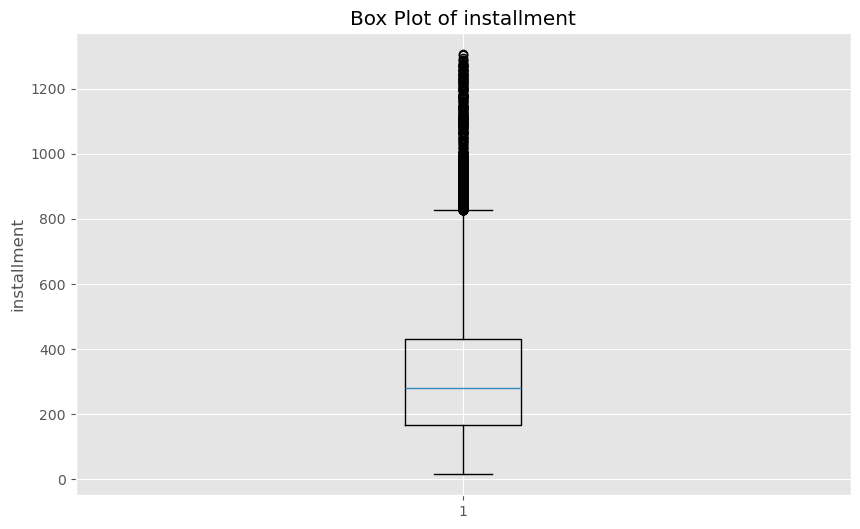

In [68]:


# Draw the box plot installment
plt.figure(figsize=(10, 6))
plt.boxplot(df['installment'])
plt.title('Box Plot of installment')
plt.ylabel('installment')
plt.show()



##### The installment of most of the rows is between 180 - 400



In [70]:
df.annual_inc.unique()

array([24000., 30000., 12252., ..., 33990., 36153., 27376.])

In [71]:
df.annual_inc.value_counts()

annual_inc
60000.0    1505
50000.0    1057
40000.0     876
45000.0     830
30000.0     825
           ... 
56820.0       1
45314.0       1
53913.0       1
62880.0       1
27376.0       1
Name: count, Length: 5318, dtype: int64

In [72]:
df.annual_inc.describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [73]:
df.annual_inc.max()

6000000.0

In [74]:
df.annual_inc.min()

4000.0

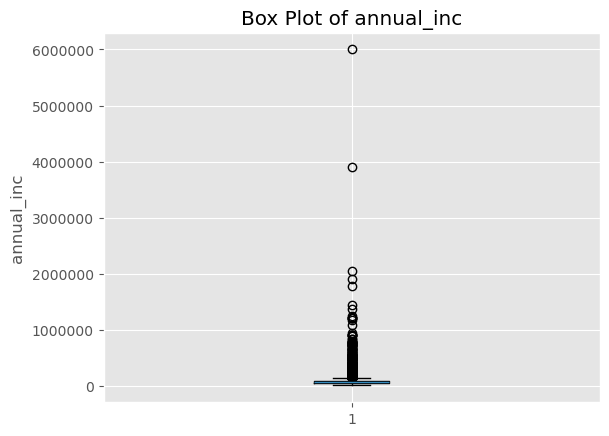

In [75]:


# Draw the box plot Annaul income
# plt.figure(figsize=(10, 6))
plt.boxplot(df['annual_inc'])
plt.title('Box Plot of annual_inc')
plt.ylabel('annual_inc')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [76]:
df.annual_inc

0         24000.0
1         30000.0
2         12252.0
3         49200.0
4         80000.0
           ...   
39712    110000.0
39713     18000.0
39714    100000.0
39715    200000.0
39716     22000.0
Name: annual_inc, Length: 39717, dtype: float64

##### Annual income has outliers, we need to replace ouliers 


In [78]:
Q1 = df['annual_inc'].quantile(0.25)
Q3 = df['annual_inc'].quantile(0.75)
IQR = Q3 - Q1


In [79]:
IQR

41896.0

In [80]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [81]:
outliers = df[(df['annual_inc'] < lower_bound) | (df['annual_inc'] > upper_bound)]

In [82]:
outliers

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,delinq_2yrs,open_acc,pub_rec,total_acc,total_pymnt,pub_rec_bankruptcies,issue_year,int_rate_decimal,term_years,total_interest_amount
74,1068893,1303514,14400.0,14400.0,14400.0,36 months,8.90,457.25,A,A5,...,0,12,0,38,16460.850000,0.0,2011,0.0890,3.0,3844.8
80,1068994,1303432,35000.0,22075.0,22050.0,60 months,17.27,551.84,D,D3,...,0,11,0,31,28887.100070,0.0,2011,0.1727,5.0,30222.5
170,1067434,1301822,25000.0,25000.0,25000.0,36 months,12.42,835.39,B,B4,...,1,11,0,23,30073.680000,0.0,2011,0.1242,3.0,9315.0
185,1067084,1301459,35000.0,35000.0,35000.0,36 months,10.65,1140.07,B,B2,...,1,16,0,22,38061.504880,0.0,2011,0.1065,3.0,11182.5
298,1065717,1299834,8000.0,8000.0,8000.0,36 months,11.71,264.61,B,B3,...,1,5,0,8,9525.870000,0.0,2011,0.1171,3.0,2810.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39694,90966,90962,5000.0,5000.0,4150.0,36 months,7.43,155.38,A,A2,...,0,2,0,19,5174.186842,NaN,2007,0.0743,3.0,1114.5
39703,94838,73673,3000.0,3000.0,2550.0,36 months,10.28,97.20,C,C1,...,1,5,0,8,3498.858899,NaN,2007,0.1028,3.0,925.2
39706,92676,92671,5000.0,5000.0,150.0,36 months,8.07,156.84,A,A4,...,0,12,0,39,5645.957239,NaN,2007,0.0807,3.0,1210.5
39707,92666,92661,5000.0,5000.0,525.0,36 months,9.33,159.77,B,B3,...,0,16,0,38,5751.530533,NaN,2007,0.0933,3.0,1399.5


##### updated the Annual income outliers with median values

In [84]:
median_annual_inc = df['annual_inc'].median()
median_annual_inc

59000.0

In [85]:
df['annual_inc'] = np.where((df['annual_inc'] < lower_bound) | (df['annual_inc'] > upper_bound), median_annual_inc, df['annual_inc'])

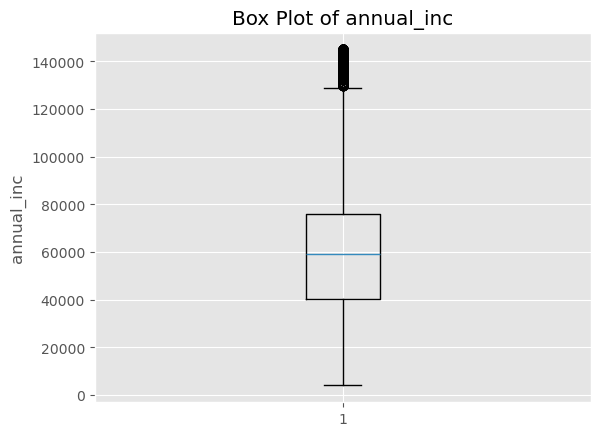

In [86]:
plt.boxplot(df['annual_inc'])
plt.title('Box Plot of annual_inc')
plt.ylabel('annual_inc')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

##### The annual income of most of the Columns is between 40, 000 - 80, 000

#### Data is cleaned, and outlier was removed for the data set

## Univariate Analysis



##### Update the data frame for only "charged off" loan status to analyse defalters

In [91]:
charged_off_df = df[df['loan_status'] == 'Charged Off']

charged_off_df.loan_status

1        Charged Off
8        Charged Off
9        Charged Off
12       Charged Off
14       Charged Off
            ...     
39667    Charged Off
39668    Charged Off
39669    Charged Off
39678    Charged Off
39688    Charged Off
Name: loan_status, Length: 5627, dtype: object

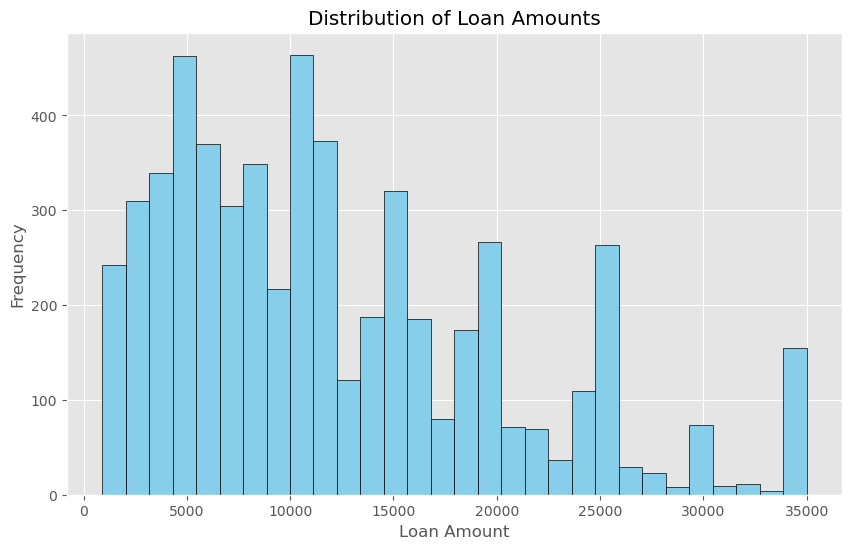

In [92]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(charged_off_df['loan_amnt'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

##### Most of the Charged Off loans for 5000 and 10000 range



##### Frequency of Loan Grades

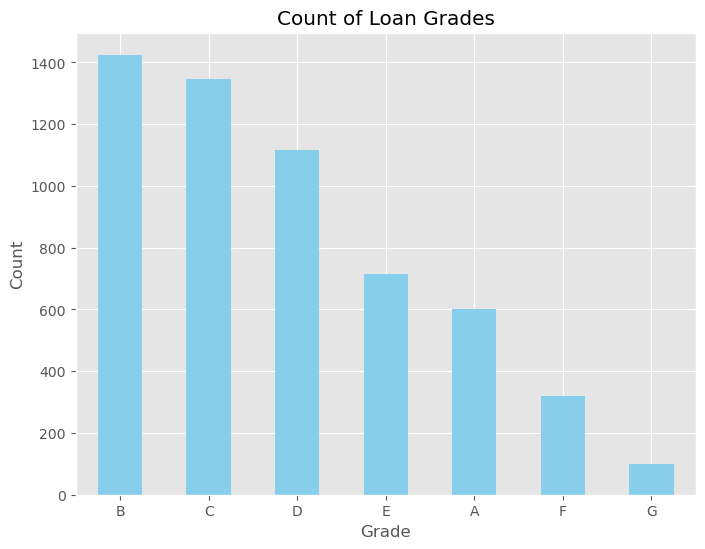

In [95]:
# Calculate the frequency distribution of grades 
grade_counts = charged_off_df['grade'].value_counts()

plt.figure(figsize=(8, 6))
grade_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Loan Grades')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

##### Grade B had most number of Charged Off loans 
##### Grade G had least number of Charged Off loans 


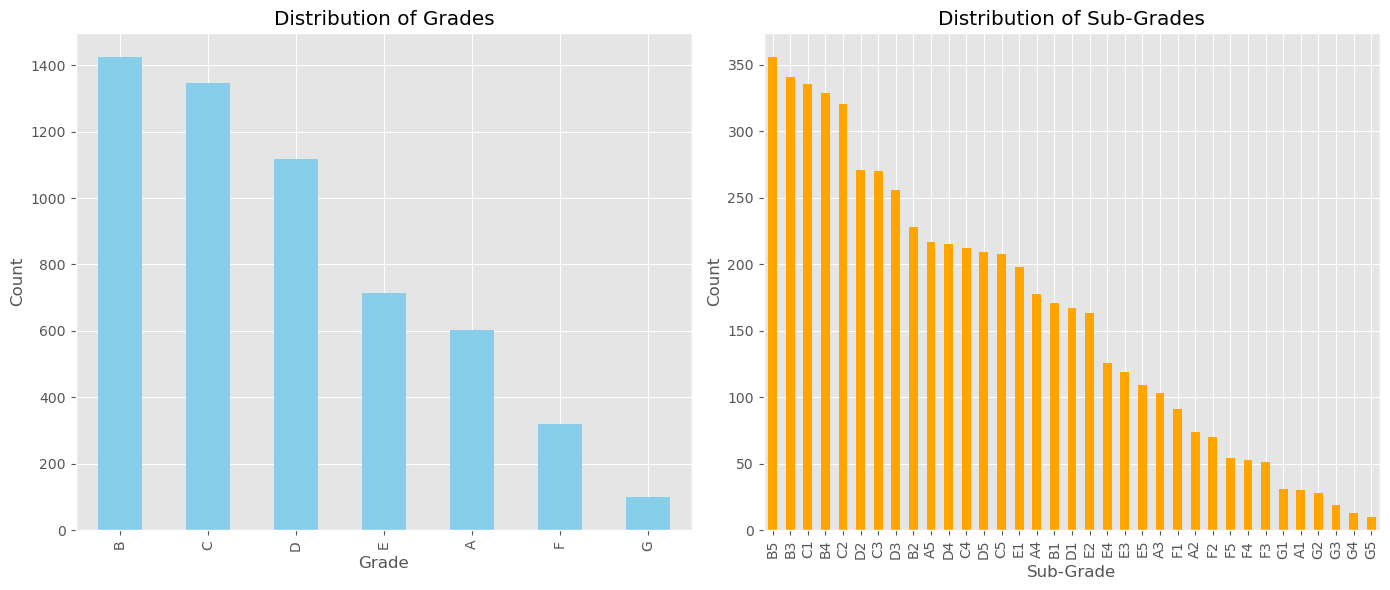

In [97]:
grade_counts = charged_off_df['grade'].value_counts()
sub_grade_counts = charged_off_df['sub_grade'].value_counts()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
grade_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Grades')
plt.xlabel('Grade')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sub_grade_counts.plot(kind='bar', color='orange')
plt.title('Distribution of Sub-Grades')
plt.xlabel('Sub-Grade')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

##### Grade B5 had most number of Charged Off loans 
##### Grade B3 had most number of Charged Off loans 
##### Grade C1 had most number of Charged Off loans 
##### Grade B4 had most number of Charged Off loans 
##### Grade C2 had most number of Charged Off loans 


In [99]:
emp_length_counts = charged_off_df['emp_length'].value_counts().sort_index()
emp_length_counts

emp_length
0      639
1      456
10    1331
2      567
3      555
4      462
5      458
6      307
7      263
8      203
9      158
Name: count, dtype: int64

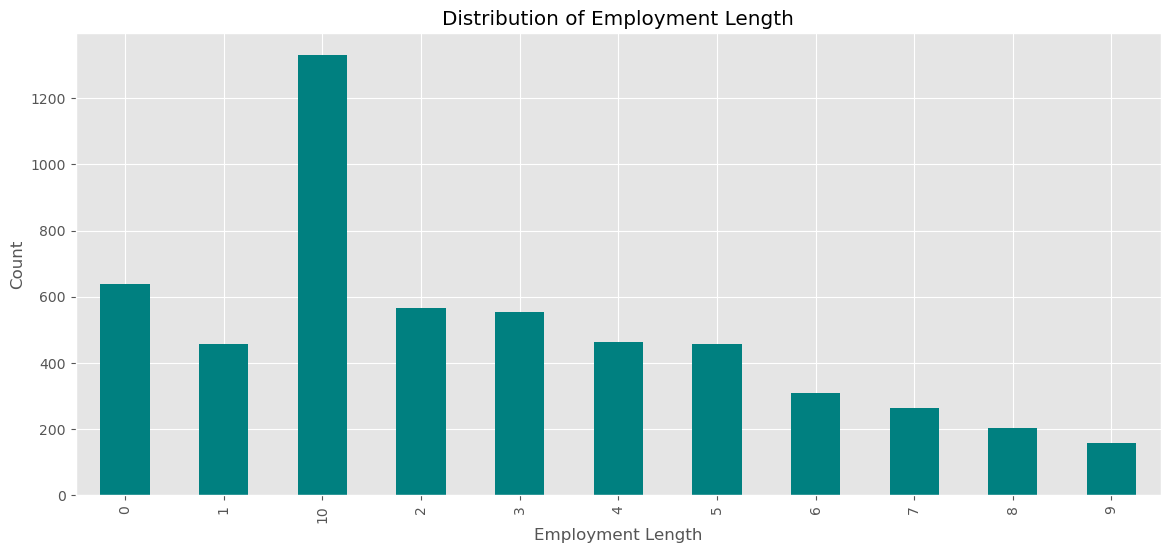

In [100]:
plt.figure(figsize=(14, 6))

# Bar Graph for Employment Length
emp_length_counts.plot(kind='bar', color='teal')
plt.title('Distribution of Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.show()

##### with employment length 10 has highest number off charged off loans  


##### Lower income might cause higher defaluters 




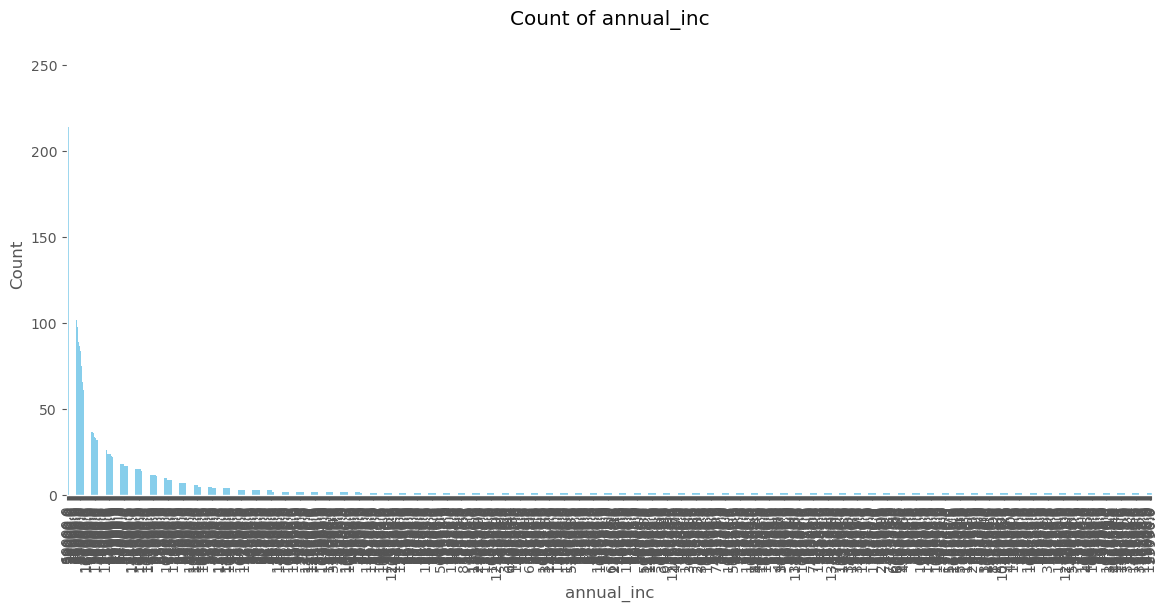

In [103]:

annual_inc_counts = charged_off_df['annual_inc'].value_counts()

plt.figure(figsize=(14, 6))
annual_inc_counts.plot(kind='bar', color='skyblue')
plt.title('Count of annual_inc')
plt.xlabel('annual_inc')
plt.ylabel('Count')
plt.show()




In [104]:
annual_inc_counts = charged_off_df['annual_inc'].value_counts() 
# Create a DataFrame from the counts 
annual_inc_df = pd.DataFrame({'annual_inc': annual_inc_counts.index, 'count': annual_inc_counts.values}) 
# Print the DataFrame print
print(annual_inc_df)

      annual_inc  count
0        60000.0    256
1        59000.0    214
2        50000.0    164
3        40000.0    156
4        30000.0    139
...          ...    ...
1154     89916.0      1
1155     43008.0      1
1156    117600.0      1
1157     26784.0      1
1158     33990.0      1

[1159 rows x 2 columns]


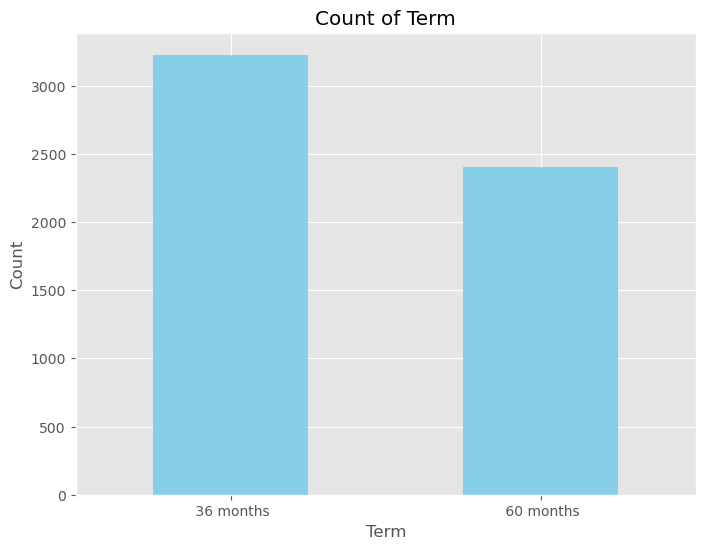

In [105]:
term_counts = charged_off_df['term'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
term_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Term')
plt.xlabel('Term')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [106]:
charged_off_df.info()
unique_years = charged_off_df['issue_year']
print(unique_years)

<class 'pandas.core.frame.DataFrame'>
Index: 5627 entries, 1 to 39688
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     5627 non-null   int64         
 1   member_id              5627 non-null   int64         
 2   loan_amnt              5627 non-null   float64       
 3   funded_amnt            5627 non-null   float64       
 4   funded_amnt_inv        5627 non-null   float64       
 5   term                   5627 non-null   object        
 6   int_rate               5627 non-null   float64       
 7   installment            5627 non-null   float64       
 8   grade                  5627 non-null   object        
 9   sub_grade              5627 non-null   object        
 10  emp_title              5143 non-null   object        
 11  emp_length             5399 non-null   object        
 12  home_ownership         5627 non-null   object        
 13  annual_

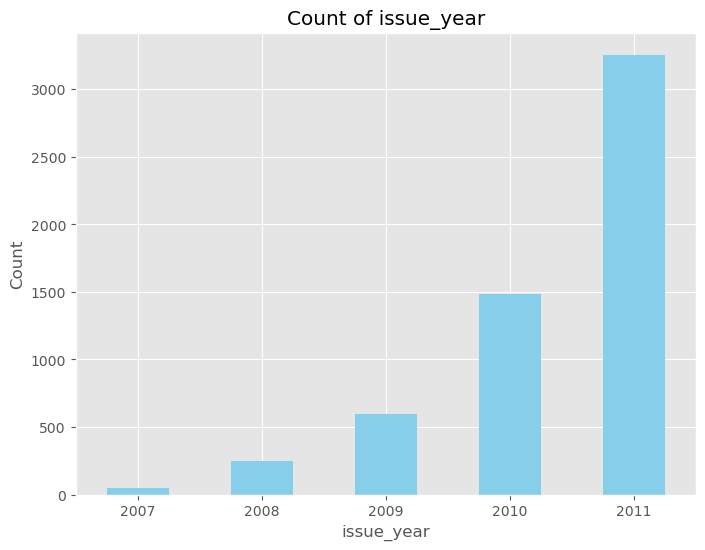

In [107]:
issue_y_counts = charged_off_df['issue_year'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
issue_y_counts.plot(kind='bar', color='skyblue')
plt.title('Count of issue_year')
plt.xlabel('issue_year')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

##### year 2011 had most number of charged off loans  


In [109]:
unique_home_ownership = charged_off_df['home_ownership']
unique_home_ownership

1            RENT
8             OWN
9            RENT
12           RENT
14           RENT
           ...   
39667    MORTGAGE
39668    MORTGAGE
39669    MORTGAGE
39678    MORTGAGE
39688    MORTGAGE
Name: home_ownership, Length: 5627, dtype: object

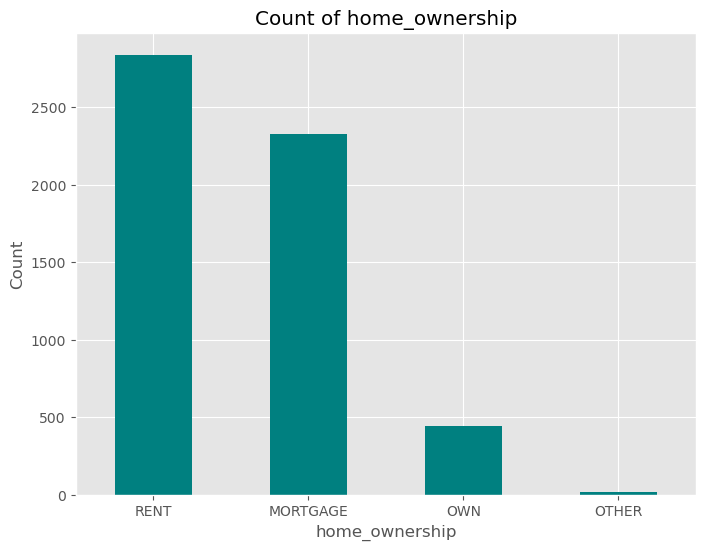

In [110]:
home_ownership_counts = charged_off_df['home_ownership'].value_counts()

plt.figure(figsize=(8, 6))
home_ownership_counts.plot(kind='bar', color='teal')
plt.title('Count of home_ownership')
plt.xlabel('home_ownership')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

##### Below are the insights drwan from Univariate Analysis:
- Most of the Charged Off loans for 5000 and 10000 range
- Grade B had most number of Charged Off loans
- Grade G had least number of Charged Off loans
- Grade B5 had most number of Charged Off loans
- Grade B3 had most number of Charged Off loans
- Grade c1 had most number of Charged Off loans
- Grade B4 had most number of Charged Off loans
- Grade C2 had most number of Charged Off loans
- with employment length 10 has highest number off charged off loans
- year 2011 had most number of charged
- Homeownership with rent and mortgage had most number of charged off loans off loans 

### Note : for the all analysis we are using charged off only as loan status 

## Segmented Univariate Analysis and Bivariate Analysis

##### Our target variable is loan_status and we have created a seperate dataframe which has records only for charged-off loans

In [117]:
#Let us observe the influence of Home Ownership on the loan status
seg_home_owner=charged_off_df.groupby('home_ownership')['loan_status'].count()


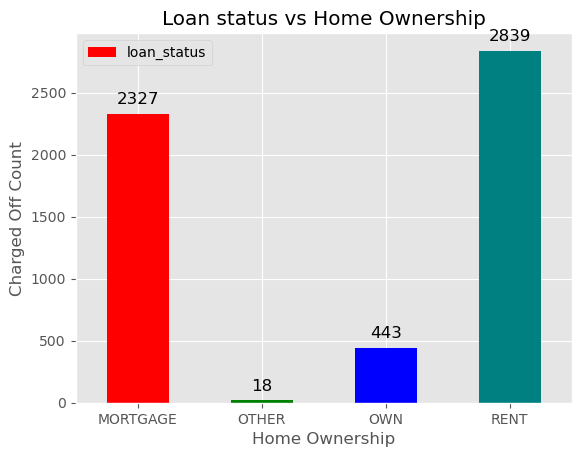

In [118]:
colors = ['red', 'green', 'blue','teal']
seg_home_owner_bar=seg_home_owner.plot.bar(legend=True,color=colors)
seg_home_owner_bar.bar_label(seg_home_owner_bar.containers[0], fontsize=12, color='black', padding=5)
plt.title('Loan status vs Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Charged Off Count')
plt.xticks(rotation=0)
plt.show()

##### The applicants living on Rent or having Morgages are more likely to default

In [120]:
#Let us observe the influence of Loan purpose on the loan status
seg_purpose=charged_off_df.groupby('purpose')['loan_status'].count()

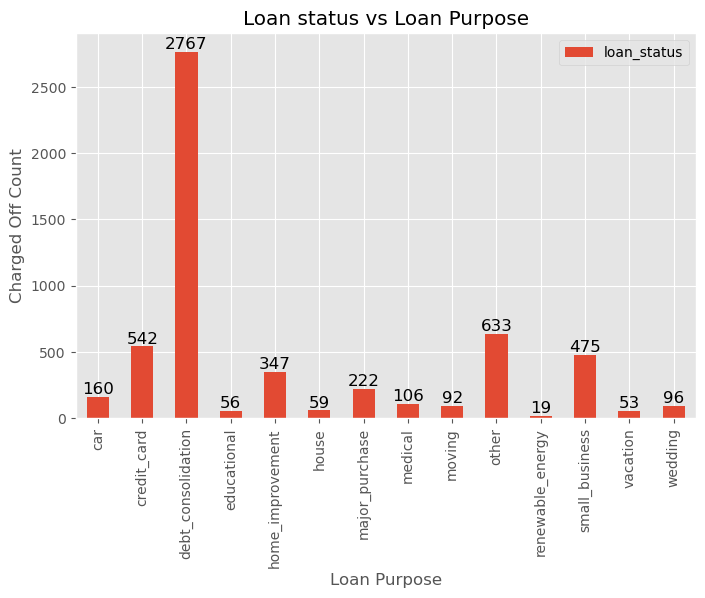

In [121]:
plt.figure(figsize=(8,5))
seg_purpose_bar=seg_purpose.plot.bar(legend=True)
seg_purpose_bar.bar_label(seg_purpose_bar.containers[0], fontsize=12, color='black')
plt.title('Loan status vs Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Charged Off Count')
plt.xticks(rotation=90)
plt.show()

##### Applicants taking loan for Debt Consolidation are more likely to default
##### Applicants taking loan for Miscelleneous purposes are more likely to default
##### Loan to repay credit card bill is also a moderate indicator that the applicant will default

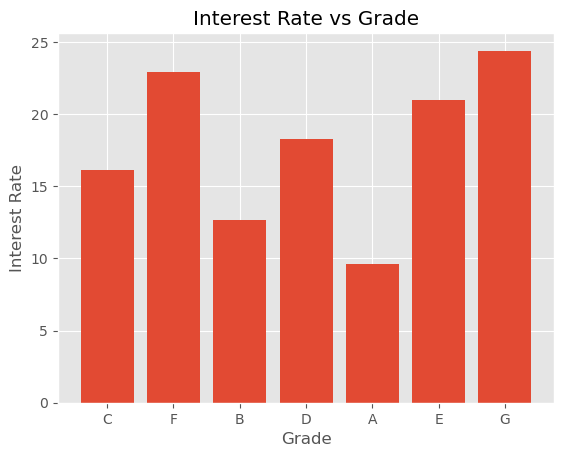

In [123]:
#Let us see the relationship between int_rate and grades
grade_rate=plt.bar(charged_off_df.grade,charged_off_df.int_rate)
plt.title('Interest Rate vs Grade')
plt.xlabel('Grade')
plt.ylabel('Interest Rate')
plt.xticks(rotation=0)
plt.show()

##### Applicants with grades E,F and G are being charged high interest rates

In [125]:
#Let us see if there's any pattern between the grades and loan status:
seg_grade_status=charged_off_df.groupby('grade')['loan_status'].count()

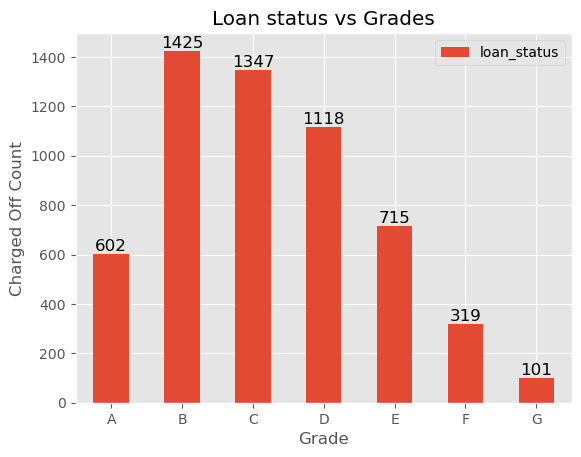

In [126]:
seg_grade_status_bar=seg_grade_status.plot.bar(legend=True)
seg_grade_status_bar.bar_label(seg_grade_status_bar.containers[0], fontsize=12, color='black')
plt.title('Loan status vs Grades')
plt.xlabel('Grade')
plt.ylabel('Charged Off Count')
plt.xticks(rotation=0)
plt.show()

##### To our surprise charging higher interest rate increases the chances of repaying the loan, as it's evident that lower grade applicants being charged higher interest rates but after observing this behaviour with the count of defaulters it seems that lower interest rates may result in default

#### Term vs Loan_Status

In [129]:
term_loan_status=charged_off_df.groupby('term')['loan_status'].count()

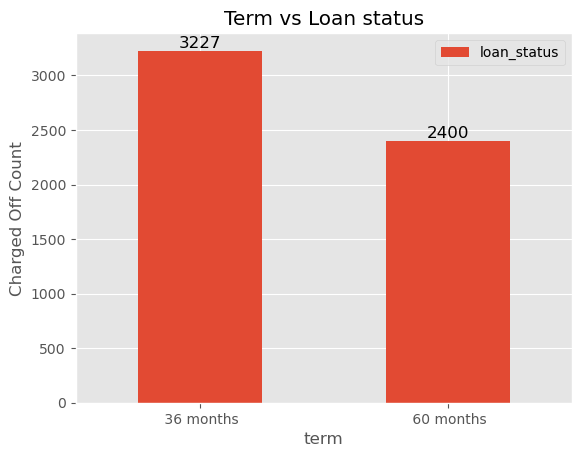

In [130]:
term_loan_status_bar=term_loan_status.plot.bar(legend=True)
term_loan_status_bar.bar_label(term_loan_status_bar.containers[0], fontsize=12, color='black')
plt.title('Term vs Loan status')
plt.xlabel('term')
plt.ylabel('Charged Off Count')
plt.xticks(rotation=0)
plt.show()

##### with term 36 month has most of the charged of loans

#### issue year vs Loan_Status

In [133]:
issue_year_loan_status=charged_off_df.groupby('issue_year')['loan_status'].count()

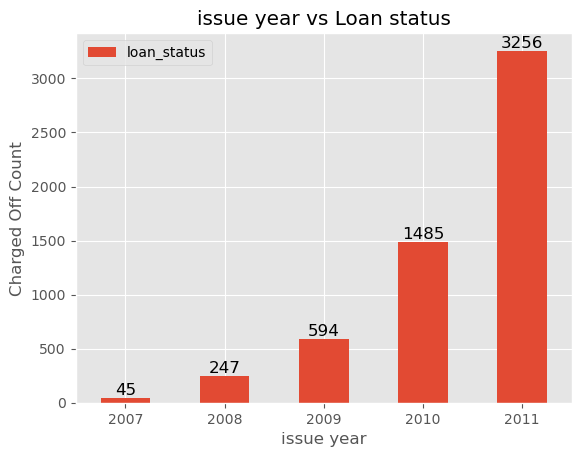

In [134]:
issue_year_loan_status_bar=issue_year_loan_status.plot.bar(legend=True)
for container in issue_year_loan_status_bar.containers: 
    issue_year_loan_status_bar.bar_label(container, fontsize=12, color='black')
plt.title('issue year vs Loan status')
plt.xlabel('issue year')
plt.ylabel('Charged Off Count')
plt.xticks(rotation=0)
plt.show()

##### Issue year 2011 had 3256 charged of loans

In [136]:
#Let us see the influence of the loan amount on out complete data set
seg_status_amount=df.groupby('loan_status')['loan_amnt'].median()

In [137]:
seg_status_amount

loan_status
Charged Off    10000.0
Current        15825.0
Fully Paid      9600.0
Name: loan_amnt, dtype: float64

##### Applicants who have repaid that debt has loan amount less than 10000

In [139]:
#Let us see the correlation between Loan Purpose and Employment length with respect to Defaulters
#creating pivot table
piv_purpose_length=pd.pivot_table(data=charged_off_df,index='emp_length',columns='purpose',values='loan_status',aggfunc='count',fill_value=0)

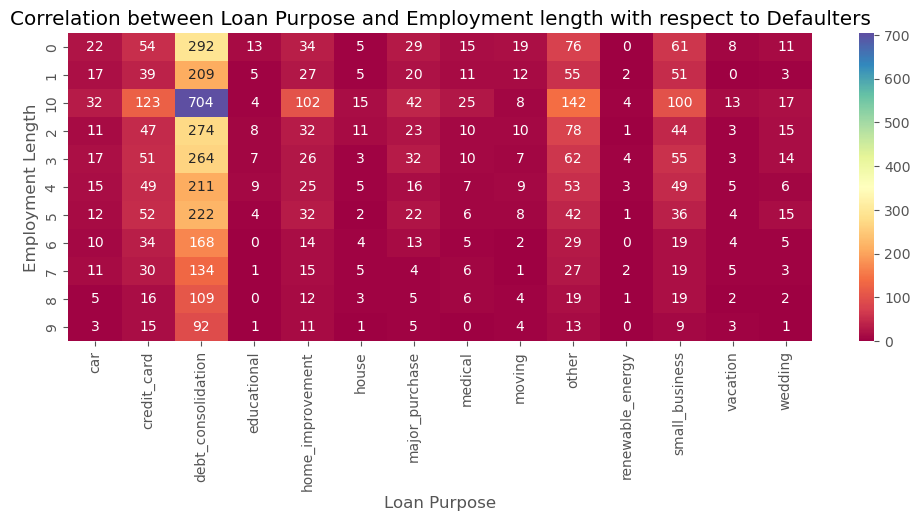

In [140]:
plt.figure(figsize=(12,4))
sns.heatmap(piv_purpose_length,fmt='g',cmap="Spectral", annot=True)
plt.title('Correlation between Loan Purpose and Employment length with respect to Defaulters')
plt.xlabel('Loan Purpose')
plt.ylabel('Employment Length')
plt.show()

##### Applicants with more that 10 years of employment who are taking loan for debt consolidation are the most risky ones

In [142]:
#Let us see the correlation between Home Owners and Employment length with respect to Defaulters
piv_purpose_ownership=pd.pivot_table(data=charged_off_df,index='home_ownership',columns='purpose',values='loan_status',aggfunc='count',fill_value=0)

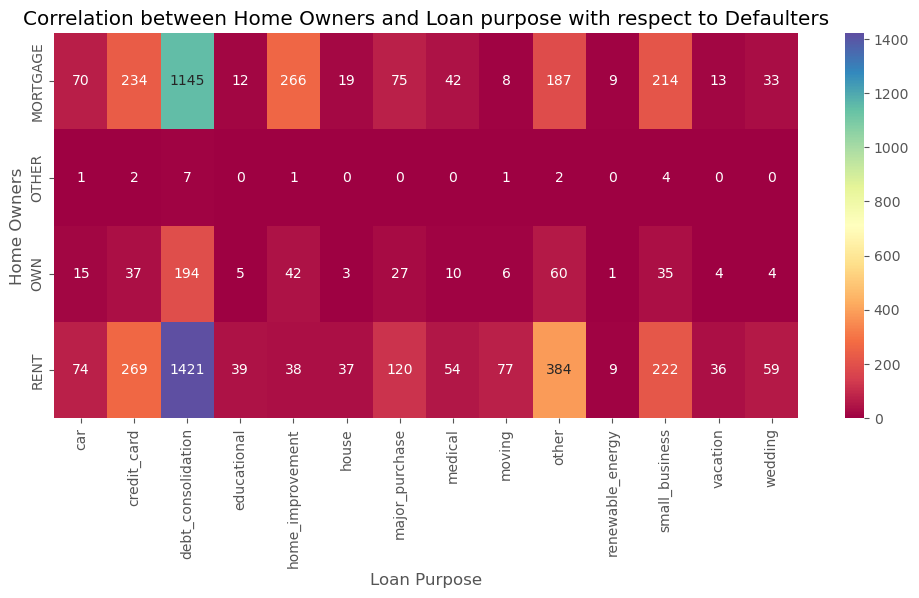

In [143]:
plt.figure(figsize=(12,5))
sns.heatmap(piv_purpose_ownership,fmt='g',cmap="Spectral", annot=True)
plt.title('Correlation between Home Owners and Loan purpose with respect to Defaulters')
plt.xlabel('Loan Purpose')
plt.ylabel('Home Owners')
plt.show()

##### Applicants living on Rent or having mortgages who are looking to consolidate their debt are risky

In [145]:
#Correlation between Home Owners and Employment length with respect to Defaulters
piv_emplength_ownership=pd.pivot_table(data=charged_off_df,index='home_ownership',columns='emp_length',values='loan_status',aggfunc='count',fill_value=0)

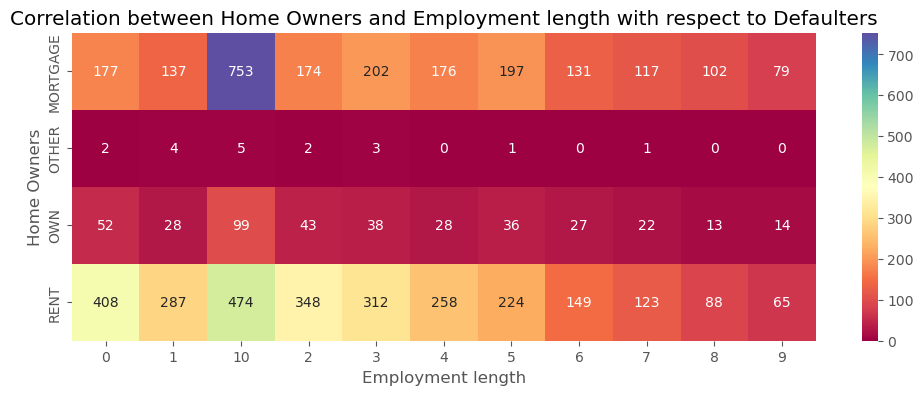

In [146]:
plt.figure(figsize=(12,4))
sns.heatmap(piv_emplength_ownership,fmt='g',cmap="Spectral", annot=True)
plt.title('Correlation between Home Owners and Employment length with respect to Defaulters')
plt.xlabel('Employment length')
plt.ylabel('Home Owners')
plt.show()

##### Applicants with more that 10 years of employment and living either on rent or have mortgages are having most risky profiles

In [148]:
#Exploring influence of annual salary and loan amount on Charged off Loan:
charged_off_df['annual_inc_slabs']=pd.qcut(charged_off_df.annual_inc, [0, 0.2, 0.4, 0.6, 0.8, 1], ["VL_Salary","L_Salary","M_Salary","H_Salary","VH_Salary"])
charged_off_df['loan_amnt_slabs']=pd.qcut(charged_off_df.loan_amnt, [0, 0.2, 0.4, 0.6, 0.8, 1], ["VL_Loan","L_Loan","M_Loan","H_Loan","VH_Loan"])
#Divided Loan Amount and Annual Salary into Slabs

/var/folders/pb/rm_km_ts0pb5v_q25wvzmby80000gn/T/ipykernel_7404/2794741181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_df['annual_inc_slabs']=pd.qcut(charged_off_df.annual_inc, [0, 0.2, 0.4, 0.6, 0.8, 1], ["VL_Salary","L_Salary","M_Salary","H_Salary","VH_Salary"])
/var/folders/pb/rm_km_ts0pb5v_q25wvzmby80000gn/T/ipykernel_7404/2794741181.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_df['loan_amnt_slabs']=pd.qcut(charged_off_df.loan_amnt, [0, 0.2, 0.4, 0.6, 0.8, 1], ["VL

In [149]:
#Pivot Table on annual_inc_slabs,loan_amnt_slabs and loan_status
piv_amnt_sal=pd.pivot_table(data=charged_off_df,index='loan_amnt_slabs',columns='annual_inc_slabs',values='loan_status',aggfunc='count')

/var/folders/pb/rm_km_ts0pb5v_q25wvzmby80000gn/T/ipykernel_7404/2328993312.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv_amnt_sal=pd.pivot_table(data=charged_off_df,index='loan_amnt_slabs',columns='annual_inc_slabs',values='loan_status',aggfunc='count')


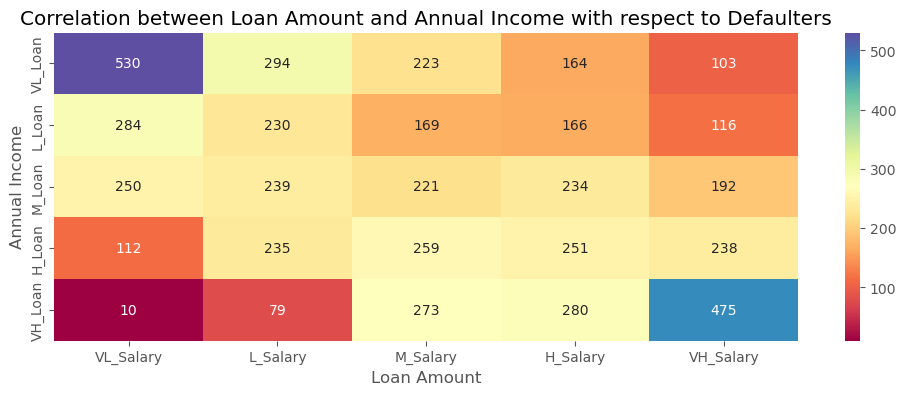

In [150]:
plt.figure(figsize=(12,4))
sns.heatmap(piv_amnt_sal,fmt='g',cmap="Spectral", annot=True)
plt.title('Correlation between Loan Amount and Annual Income with respect to Defaulters')
plt.xlabel('Loan Amount')
plt.ylabel('Annual Income')
plt.show()

##### applicants with salary less than 35000 and higher than 75600 are risky
##### applicants taking loan less than 5000 or higher than 19200 are risky

In [152]:
#Analyzing the verification status with repect to loan_status
seg_Verification=charged_off_df.groupby('verification_status')['loan_status'].count()

##### Note: We are considering Verified and Source Verified as single value and we have already replaced 'Source verified' with 'Verified' 

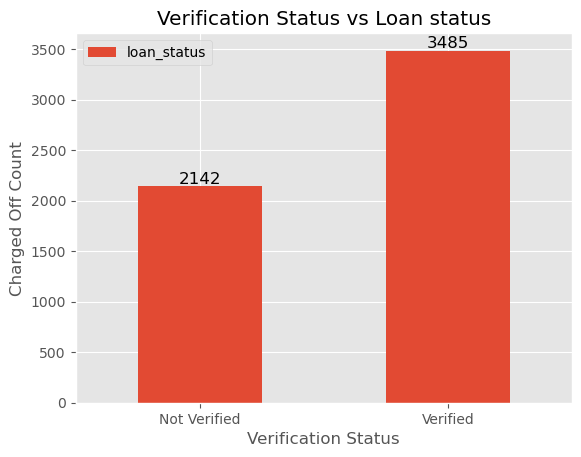

In [155]:
Verification_loan_bar=seg_Verification.plot.bar(legend=True)
Verification_loan_bar.bar_label(Verification_loan_bar.containers[0], fontsize=12, color='black')
plt.title('Verification Status vs Loan status')
plt.xlabel('Verification Status')
plt.ylabel('Charged Off Count')
plt.xticks(rotation=0)
plt.show()

##### We can observe that un-verified applicants are more likely to default, so verifying the applicants might help in reducing the risky loans

In [157]:
#Correlation of dti with other columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     39717 non-null  int64         
 1   member_id              39717 non-null  int64         
 2   loan_amnt              39717 non-null  float64       
 3   funded_amnt            39717 non-null  float64       
 4   funded_amnt_inv        39717 non-null  float64       
 5   term                   39717 non-null  object        
 6   int_rate               39717 non-null  float64       
 7   installment            39717 non-null  float64       
 8   grade                  39717 non-null  object        
 9   sub_grade              39717 non-null  object        
 10  emp_title              37258 non-null  object        
 11  emp_length             38642 non-null  object        
 12  home_ownership         39717 non-null  object        
 13  a

In [158]:
corr_df = df.copy()
corr_df = corr_df.drop(columns=['term', 'grade','sub_grade','emp_title','emp_length','home_ownership','verification_status',
                               'issue_d','loan_status','purpose','title','addr_state','total_interest_amount','int_rate_decimal',
                               'issue_year', 'issue_d','id','member_id','open_acc','pub_rec'])



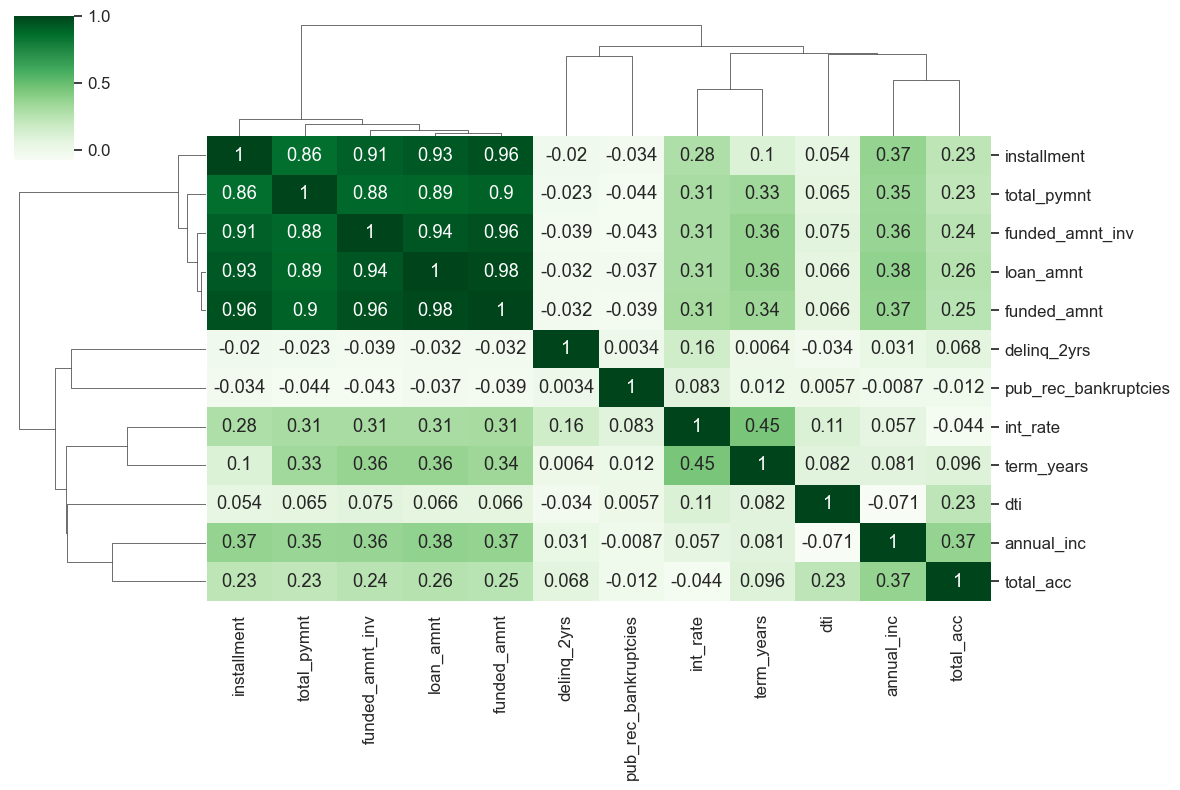

In [159]:
corr = corr_df.corr()
sns.set(font_scale=1.1)
sns.clustermap(corr, annot=True, figsize=(12, 8), cmap="Greens")
plt.show()


#### Strong Correlation
- installment has a strong correlation with total_pymnt, funded_amnt_inv, loan_amnt, and funded_amnt'
- term_years has a strong correlation with int_rate

#### weak Correlation
- dti has a weak correlation with all columns
- delinq_2yrs has a weak correlation with all columns
- pub_rec_bankruptcies has a weak correlation with all columns


## Summary


#### Below are the insights drwan from Univariate Analysis:
- Most of the Charged Off loans for 5000 and 10000 range
- Grade B had most number of Charged Off loans
- Grade G had least number of Charged Off loans
- Grade B5 had most number of Charged Off loans
- Grade B3 had most number of Charged Off loans
- Grade c1 had most number of Charged Off loans
- Grade B4 had most number of Charged Off loans
- Grade C2 had most number of Charged Off loans
- with employment length 10 has highest number off charged off loans
- year 2011 had most number of charged
- Homeownership with rent and mortgage had most number of charged off loans off loans 
#### Below are the insights drawn from Segmented and Bivariate Analysis:
- The applicants living on Rent or having Morgages are more likely to default
- Applicants taking loan for Debt Consolidation are more likely to default
- Applicants taking loan for Miscelleneous purposes are more likely to default
- Loan to repay credit card bill is also a moderate indicator that the applicant will default
- Applicants with grades E,F and G are being charged high interest rates
- To our surprise charging higher interest rate increases the chances of repaying the loan, as it's evident that lower grade applicants being charged higher interest rates but after observing this behaviour with the count of defaulters it seems that lower interest rates may result in default
- with term 36 month has most of the charged of loans
- Issue year 2011 had 3256 charged of loans
- Applicants who have repaid that debt has loan amount less than 10000
- Applicants with more that 10 years of employment who are taking loan for debt consolidation are the most risky ones
- Applicants living on Rent or having mortgages who are looking to consolidate their debt are risky
- Applicants with more that 10 years of employment and living either on rent or have mortgages are having most risky profiles
- applicants with salary less than 35000 and higher than 75600 are risky
- applicants taking loan less than 5000 or higher than 19200 are risky
- We can observe that un-verified applicants are more likely to default, so verifying the applicants might help in reducing the risky loans 
#### Strong Correlation
- installment has a strong correlation with total_pymnt, funded_amnt_inv, loan_amnt, and funded_amnt'
- term_years has a strong correlation with int_rate
#### weak Correlation
- dti has a weak correlation with all columns
- delinq_2yrs has a weak correlation with all columns
- pub_rec_bankruptcies has a weak correlation with all columns